# *TASK 1 : Exploratory Data Analysis (EDA) and Business Insights*

**Importing necessary libraries**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

**File paths**

In [2]:
customers_path = '/kaggle/input/dataset3/Customers.csv'
products_path = '/kaggle/input/dataset3/Products.csv'
transactions_path = '/kaggle/input/dataset3/Transactions.csv'

**Loading datasets**

In [3]:
customers = pd.read_csv(customers_path)
products = pd.read_csv(products_path)
transactions = pd.read_csv(transactions_path)

**Preview datasets**

In [4]:
print("Customers Dataset:")
print(customers.head(), "\n")
print("Products Dataset:")
print(products.head(), "\n")
print("Transactions Dataset:")
print(transactions.head(), "\n")

Customers Dataset:
  CustomerID        CustomerName         Region  SignupDate
0      C0001    Lawrence Carroll  South America  2022-07-10
1      C0002      Elizabeth Lutz           Asia  2022-02-13
2      C0003      Michael Rivera  South America  2024-03-07
3      C0004  Kathleen Rodriguez  South America  2022-10-09
4      C0005         Laura Weber           Asia  2022-08-15 

Products Dataset:
  ProductID              ProductName     Category   Price
0      P001     ActiveWear Biography        Books  169.30
1      P002    ActiveWear Smartwatch  Electronics  346.30
2      P003  ComfortLiving Biography        Books   44.12
3      P004            BookWorld Rug   Home Decor   95.69
4      P005          TechPro T-Shirt     Clothing  429.31 

Transactions Dataset:
  TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T00166 

**Checking for missing values**

In [5]:
print("Missing Values in Customers Dataset:")
print(customers.isnull().sum(), "\n")
print("Missing Values in Products Dataset:")
print(products.isnull().sum(), "\n")
print("Missing Values in Transactions Dataset:")
print(transactions.isnull().sum(), "\n")

Missing Values in Customers Dataset:
CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64 

Missing Values in Products Dataset:
ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64 

Missing Values in Transactions Dataset:
TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64 



**Checking data types**

In [6]:
print("Data Types in Customers Dataset:")
print(customers.dtypes, "\n")

print("Data Types in Products Dataset:")
print(products.dtypes, "\n")

print("Data Types in Transactions Dataset:")
print(transactions.dtypes, "\n")

Data Types in Customers Dataset:
CustomerID      object
CustomerName    object
Region          object
SignupDate      object
dtype: object 

Data Types in Products Dataset:
ProductID       object
ProductName     object
Category        object
Price          float64
dtype: object 

Data Types in Transactions Dataset:
TransactionID       object
CustomerID          object
ProductID           object
TransactionDate     object
Quantity             int64
TotalValue         float64
Price              float64
dtype: object 



**Converting dates to datetime format**

In [7]:
customers['SignupDate'] = pd.to_datetime(customers['SignupDate'])
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])

**Summary statistics**

In [8]:
print("Summary Statistics for Transactions:")
print(transactions.describe(), "\n")

Summary Statistics for Transactions:
                     TransactionDate     Quantity   TotalValue       Price
count                           1000  1000.000000  1000.000000  1000.00000
mean   2024-06-23 15:33:02.768999936     2.537000   689.995560   272.55407
min              2023-12-30 15:29:12     1.000000    16.080000    16.08000
25%       2024-03-25 22:05:34.500000     2.000000   295.295000   147.95000
50%       2024-06-26 17:21:52.500000     3.000000   588.880000   299.93000
75%              2024-09-19 14:19:57     4.000000  1011.660000   404.40000
max              2024-12-28 11:00:00     4.000000  1991.040000   497.76000
std                              NaN     1.117981   493.144478   140.73639 



**Merging datasets**

In [9]:
merged_data = transactions.merge(customers, on='CustomerID', how='left')
merged_data = merged_data.merge(products, on='ProductID', how='left')



**Exploratory Data Analysis (EDA) 1. Customer demographics**


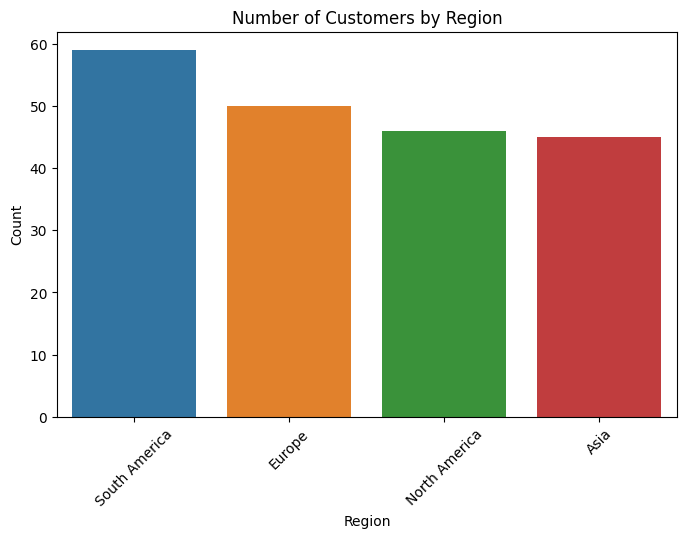

In [10]:
customer_region_counts = customers['Region'].value_counts()
plt.figure(figsize=(8, 5))
sns.barplot(x=customer_region_counts.index, y=customer_region_counts.values)
plt.title('Number of Customers by Region')
plt.xlabel('Region')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

**2. Product category distribution**

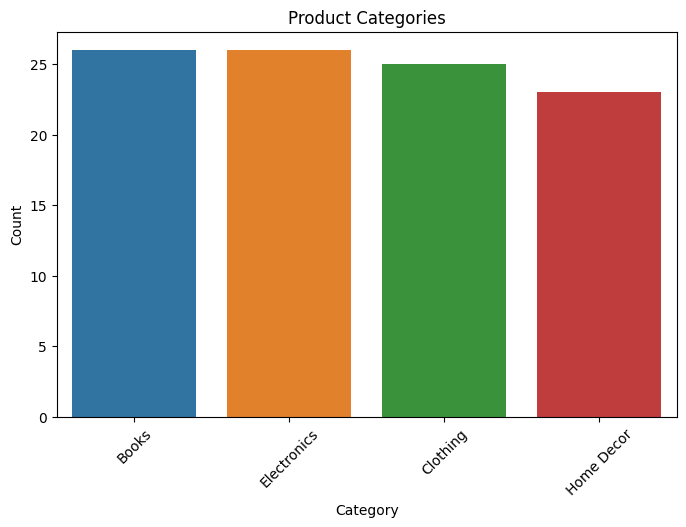

In [11]:
product_category_counts = products['Category'].value_counts()
plt.figure(figsize=(8, 5))
sns.barplot(x=product_category_counts.index, y=product_category_counts.values)
plt.title('Product Categories')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

**3. Transaction trends over time**

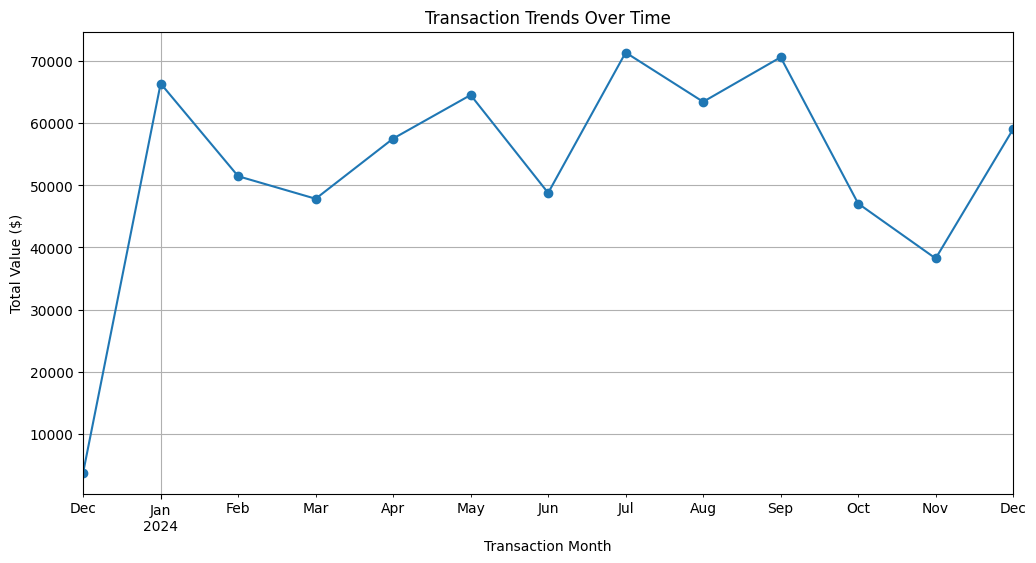

In [12]:
merged_data['TransactionMonth'] = merged_data['TransactionDate'].dt.to_period('M')
transaction_trends = merged_data.groupby('TransactionMonth')['TotalValue'].sum()
plt.figure(figsize=(12, 6))
transaction_trends.plot(kind='line', marker='o')
plt.title('Transaction Trends Over Time')
plt.xlabel('Transaction Month')
plt.ylabel('Total Value ($)')
plt.grid()
plt.show()

4**. Top customers by total spending**

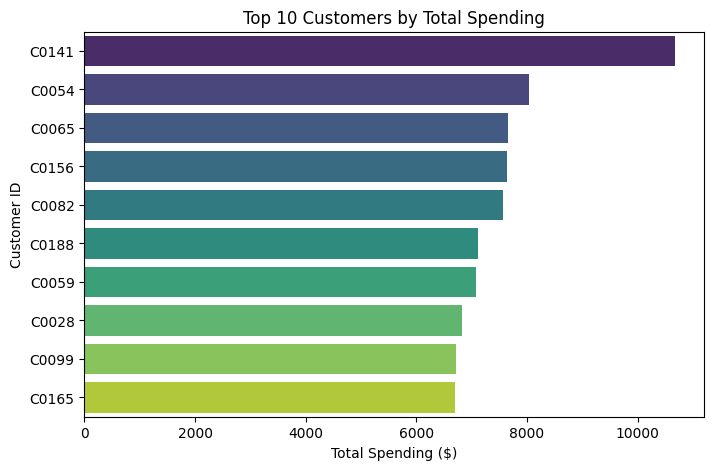

In [13]:
top_customers = merged_data.groupby('CustomerID')['TotalValue'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(8, 5))
sns.barplot(x=top_customers.values, y=top_customers.index, palette='viridis')
plt.title('Top 10 Customers by Total Spending')
plt.xlabel('Total Spending ($)')
plt.ylabel('Customer ID')
plt.show()

**5. Most sold products**

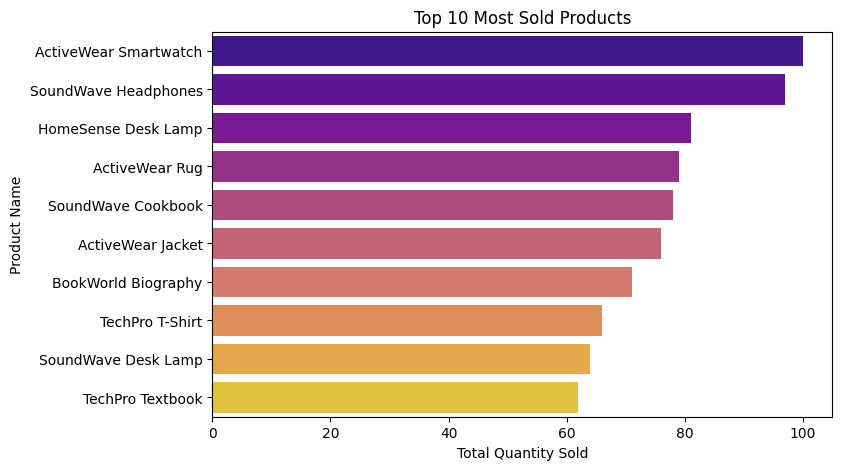

In [14]:
top_products = merged_data.groupby('ProductName')['Quantity'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(8, 5))
sns.barplot(x=top_products.values, y=top_products.index, palette='plasma')
plt.title('Top 10 Most Sold Products')
plt.xlabel('Total Quantity Sold')
plt.ylabel('Product Name')
plt.show()